<h1> <i>Session 2: Linear Regression Extended.</i> </h1>

<p>The following notebook provides an example code of analyzing <b>house prices</b> using linear regression.The dependent variable which we will be used in OLS model is Price. The aim of the session is reveal best model using different selection methods and data transformations.
    
<br>The general sequence of steps for the analysis the following:
1. [Descriptive analysis](#pandas)
2. [Data transformation for visual insights](#transf)
3.  [Model selection](#select)
4. [Running and building the OLS model /statsmodels/ (backward selection, model transformation, test performance)](#stats)
5. [Checking LR assumptions using residual analysis and statistical tests](#resid)   

Let's first explore the data on our features.

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Type: Type of house(h - house; u - unit, duplex; t - townhouse)

Price: Price in dollars

Method: 

Status of property sale(S-property sold;SP-property sold prior;PI-property passed in;VB-vendor bid) 

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Postcode:Postal code

Bedroom2: Number of Bedrooms

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Area of Building

YearBuilt: Year the house was built

CouncilArea: City Council Area Name

Lattitude, Longitude: Building's geographical ooordinates

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

<i> <u>Before starting any analysis, first import all the needed libraries.</u></i>

In [1]:
import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared

 <h2>1.Descriptive analysis</h2> <a name="pandas"></a>

In [2]:
#importing the data and making a dataframe
data=pd.read_excel("housing_data.xlsx")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
Suburb           110 non-null object
Address          110 non-null object
Rooms            110 non-null int64
Type             110 non-null object
Price            110 non-null int64
Method           110 non-null object
SellerG          110 non-null object
Date             110 non-null object
Distance         110 non-null float64
Postcode         110 non-null int64
Bedroom          110 non-null int64
Bathroom         110 non-null int64
Car              110 non-null int64
Landsize         110 non-null int64
BuildingArea     110 non-null float64
YearBuilt        110 non-null int64
CouncilArea      110 non-null object
Lattitude        110 non-null float64
Longtitude       110 non-null float64
Regionname       110 non-null object
Propertycount    110 non-null int64
dtypes: float64(4), int64(9), object(8)
memory usage: 18.1+ KB


We have 21 variables of 110 observations.

In [4]:
#have a look at first rows of the dataframe
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,3/8 Walter St,2,t,865000,SP,Nelson,18/03/2017,5.9,3032,...,2,1,146,132.0,2015,Moonee Valley City Council,-37.7713,144.9038,Western Metropolitan,6567
1,Ascot Vale,12/9 Milton St,2,u,442000,S,Alexkarbon,18/06/2016,5.9,3032,...,1,1,0,62.0,1975,Moonee Valley City Council,-37.7733,144.9219,Western Metropolitan,6567
2,Ascot Vale,21A Geddes St,3,h,1037500,S,Alexkarbon,19/11/2016,5.9,3032,...,1,2,506,110.0,1920,Moonee Valley City Council,-37.7779,144.9133,Western Metropolitan,6567
3,Ascot Vale,1/20 Newsom St,3,t,1050000,S,Jellis,19/11/2016,5.9,3032,...,2,2,318,160.0,2013,Moonee Valley City Council,-37.7744,144.9035,Western Metropolitan,6567
4,Ascot Vale,4/27 Roseberry St,2,u,440000,S,McDonald,19/11/2016,5.9,3032,...,1,1,0,65.0,1970,Moonee Valley City Council,-37.7749,144.9137,Western Metropolitan,6567


In [5]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.081818,1.011146e+06,10.210000,3083.490909,3.081818,1.672727,1.609091,488.327273,149.456818,1964.009091,-37.805117,144.963558,7644.827273
std,0.968606,5.049120e+05,6.508653,90.533561,1.023860,0.791110,0.919667,434.624738,79.724047,39.751636,0.076131,0.127405,4100.849961
min,1.000000,2.750000e+05,2.400000,3011.000000,1.000000,1.000000,0.000000,0.000000,35.000000,1890.000000,-38.099950,144.609770,962.000000
25%,3.000000,6.888750e+05,5.200000,3032.000000,2.250000,1.000000,1.000000,208.500000,101.750000,1930.000000,-37.861365,144.908150,5164.500000
50%,3.000000,9.435000e+05,6.400000,3056.000000,3.000000,2.000000,2.000000,450.500000,139.000000,1970.000000,-37.778100,144.958350,6567.000000
75%,4.000000,1.272000e+06,14.000000,3132.500000,4.000000,2.000000,2.000000,639.500000,175.750000,2004.000000,-37.772800,145.023403,10579.000000
max,8.000000,2.950000e+06,35.400000,3752.000000,9.000000,7.000000,4.000000,2905.000000,618.000000,2017.000000,-37.576810,145.299590,21650.000000


In [6]:
#checking for NAs
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
#checking whether there are columns having same value for all observations
data.columns[data.nunique()==1]

Index([], dtype='object')

In [8]:
#checking for duplicates, 2 easy ways are:
print(data[data.duplicated()])
print(data.duplicated().any())

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]
False


Note that in case of having duplicated values we will drop them using <code>drop_duplicates()</code> method

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


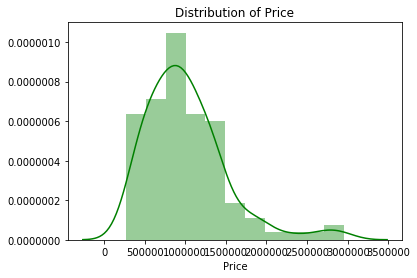

In [9]:
#let's visualise the distribution of price
sns.distplot(data.Price,color="green")
plt.title("Distribution of Price")
plt.show()

As it can be seen, we have a right-skewed data  of a large scale.

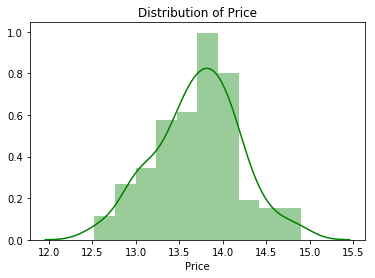

In [10]:
#Lets see what the log(price) distribution will look like
sns.distplot(np.log(data.Price),color="green")
plt.title("Distribution of log(Price)")
plt.show()

As it can be seen from the plot, the log(Price) distribution is more like a bell-shaped than the previous one.

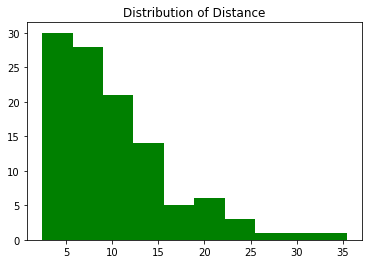

In [12]:
#let's visualise one of explanatory variables
plt.hist(data.Distance, color="green")
plt.title("Distribution of Distance")
plt.show()

In [13]:
#let's see categories and number of observations in each category for object variables
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

Suburb 
 Ascot Vale          25
Brunswick           16
Ashburton            8
Brunswick East       5
Point Cook           3
Werribee             2
Roxburgh Park        2
Boronia              2
Reservoir            2
Sunshine West        2
Taylors Hill         2
Altona               2
Brighton             2
Broadmeadows         2
Oakleigh South       2
Richmond             2
Yarraville           2
Toorak               2
Wheelers Hill        2
Parkdale             1
Seddon               1
Brunswick West       1
West Footscray       1
Brooklyn             1
Wyndham Vale         1
Thomastown           1
Nunawading           1
Balwyn               1
Bayswater North      1
Blackburn North      1
Preston              1
Brighton East        1
Avondale Heights     1
South Morang         1
Blackburn            1
Seabrook             1
Seaford              1
Ringwood North       1
Aspendale            1
Ashwood              1
Vermont              1
Surrey Hills         1
Sunbury              1
Al

<h1>2.Data transformation for visual insights </h1> <a name="transf"> </a>

We can see that Suburbs, Address,SellerG, Date, CouncilArea have unique values for almost every observation. As most of them cannot be grouped into category with less levels, we will not use them in further analysis and prediction.
However, we can try to get some insights with date variable, categorize it by season and use it for descriptive analysis.

In [14]:
#let's drop the  following variables:"Suburb","Address","SellerG","CouncilArea",'Postcode',"Lattitude", "Longitude" 
#as some of them don't provide any meaningful information, and some have too many categories
data.drop(["Suburb","Address","SellerG","CouncilArea","Postcode", "Lattitude", "Longtitude"],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
Rooms            110 non-null int64
Type             110 non-null object
Price            110 non-null int64
Method           110 non-null object
Date             110 non-null object
Distance         110 non-null float64
Bedroom          110 non-null int64
Bathroom         110 non-null int64
Car              110 non-null int64
Landsize         110 non-null int64
BuildingArea     110 non-null float64
YearBuilt        110 non-null int64
Regionname       110 non-null object
Propertycount    110 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 12.1+ KB


 <h3>2.1.Descriptive analysis using visualization</h3>

<i><b>Let's outline some questions that might be insightful from price analytics point.</i></b>

      -Is there a seasonality trend for Price? 
      -Does the Price change drastically based on year/century built?
      -Does the Price differ based on Region?(please try to explore and find patterns yourself)

In [16]:
#First let's transform the "Date" column into datetime format

In [17]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)

In [18]:
#separating the month
data["Month"]=data["Date"].apply(lambda x:x.month)

In [19]:
#transforming the date into season
data["Season"]=data.Month.apply(lambda x: (x%12 + 3)//3)

In [20]:
#Creating new variable from the existing one
data['YearSold']=data["Date"].apply(lambda x:x.year)

In [21]:
#renaming the values 1-4 into Seasons and adding a column
data["Season"]=data.Season.map({1:'Winter',2:'Spring',3:'Summer',4:'Autumn'})

In [22]:
data["Season"].value_counts()

Summer    68
Spring    19
Winter    15
Autumn     8
Name: Season, dtype: int64

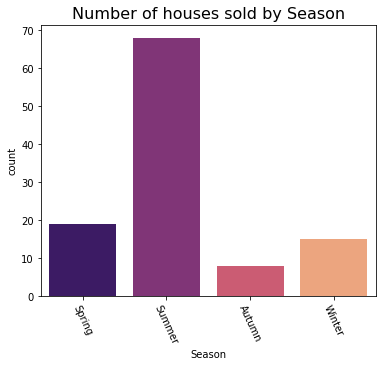

In [23]:
#let's see the Number of houses sold by season
plt.figure(figsize=(6,5))
cp=sns.countplot(x="Season",data=data, palette='magma',orient="h")
cp.set_xticklabels(cp.get_xticklabels(),rotation=-65)
plt.xlabel("Season")
plt.title("Number of houses sold by Season",fontdict={"fontsize":16})
plt.show()

In [24]:
#Let's also see mean price by season using groupby method
season_df=data.groupby(by='Season').mean()

In [25]:
season_df

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Month,YearSold
Season,,,,,,,,,,,,
Autumn,3.625000,1.260062e+06,7.175000,3.750000,2.250000,1.875000,450.750000,186.625000,1958.125000,5688.250000,10.250000,2016.000000
Spring,2.736842,1.210158e+06,6.747368,2.684211,1.736842,1.368421,312.263158,161.497368,1958.947368,7654.684211,4.315789,2016.631579
Summer,3.029412,9.310456e+05,11.325000,3.029412,1.573529,1.661765,531.911765,142.217647,1964.955882,7841.073529,7.058824,2016.838235
Winter,3.466667,9.894333e+05,11.160000,3.466667,1.733333,1.533333,533.800000,147.200000,1969.266667,7786.200000,10.000000,2017.000000


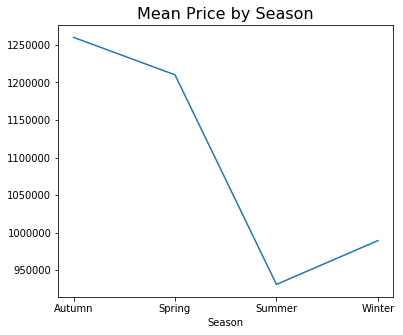

In [26]:
#let's see the mean price by season
plt.figure(figsize=(6,5))
plt.plot(season_df.Price)
plt.xlabel("Season")
plt.title("Mean Price by Season",fontdict={"fontsize":16})
plt.show()

We can see that mean price is lower during summer season, which hints why most of the houses are sold in summer.

In [27]:
#transforming only Built Year into datetime 
data['YearBuilt']=pd.to_datetime(data['YearBuilt'],format='%Y').apply(lambda x:x.year)

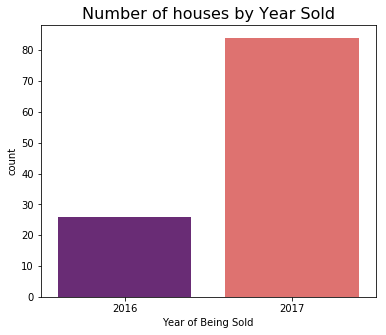

In [30]:
#When were most of the houses sold?
plt.figure(num=None, figsize=(6,5))
sns.countplot(x="YearSold",data=data, palette='magma')
plt.xlabel("Year of Being Sold")
plt.title("Number of houses by Year Sold",fontdict={"fontsize":16})
plt.show()

In [31]:
#An example of a derived varibale
#How many years "old" are the houses sold?
data["year_diff"]=data["YearSold"]-data["YearBuilt"]
print(data["year_diff"].describe())

count    110.000000
mean      52.754545
std       39.700065
min        0.000000
25%       12.250000
50%       47.000000
75%       87.000000
max      127.000000
Name: year_diff, dtype: float64


Note that 50% of the houses sold are 47 years old and the maximum age is 127.

In [32]:
#Let's see mean price of the houses by year built
yearly_df=data.groupby(by='YearBuilt').mean()

Text(0.5, 1.0, 'Mean price by Year Built')

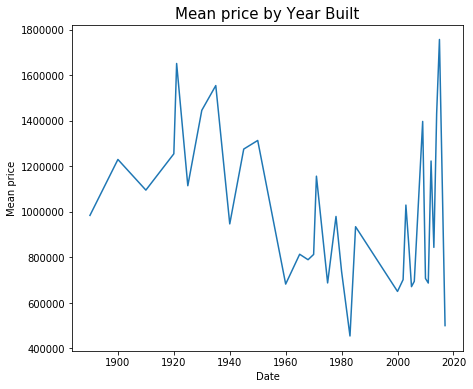

In [33]:
plt.figure(num=None, figsize=(7,6))
plt.plot(yearly_df.Price)
plt.xlabel("Date")
plt.ylabel("Mean price")
plt.title('Mean price by Year Built', fontsize=15)

Apparently mean price has its highest peak at 2017. Fluctuations in price for other years might be dependent on Region and other factors as well.

As we have too many years, it would be more convenient and representative for visualization to transform years into centuries.
We will do it using the following function and apply() method

In [34]:
def century(row):
    if row>2000:
        val = "20th"
    else:
        val="19th"
    return val

In [35]:
data.YearBuilt.apply(century).value_counts()

19th    78
20th    32
Name: YearBuilt, dtype: int64

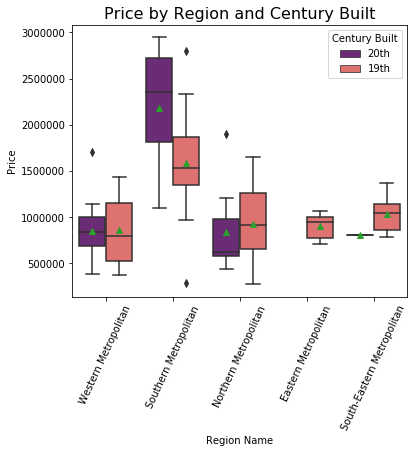

In [36]:
plt.figure(num=None, figsize=(6,5))
bx=sns.boxplot(x="Regionname",y="Price", data=data, palette='magma',hue=data.YearBuilt.apply(century),  showmeans=True)
bx.set_xticklabels(bx.get_xticklabels(),rotation=65)
plt.legend(title='Century Built', loc='upper right')
plt.xlabel("Region Name")
plt.title("Price by Region and Century Built",fontdict={"fontsize":16})
plt.show()

We can see that the highest mean price is at Souther Metropolitan region for houses built at 20th century.

To have the final data without the transformed variables, we will drop them.

In [37]:
data.drop(["Date","YearBuilt","Month", "Season","YearSold","year_diff" ],axis=1,inplace=True)

<h1> 3. Model selection </h1> <a name="select"> </a>

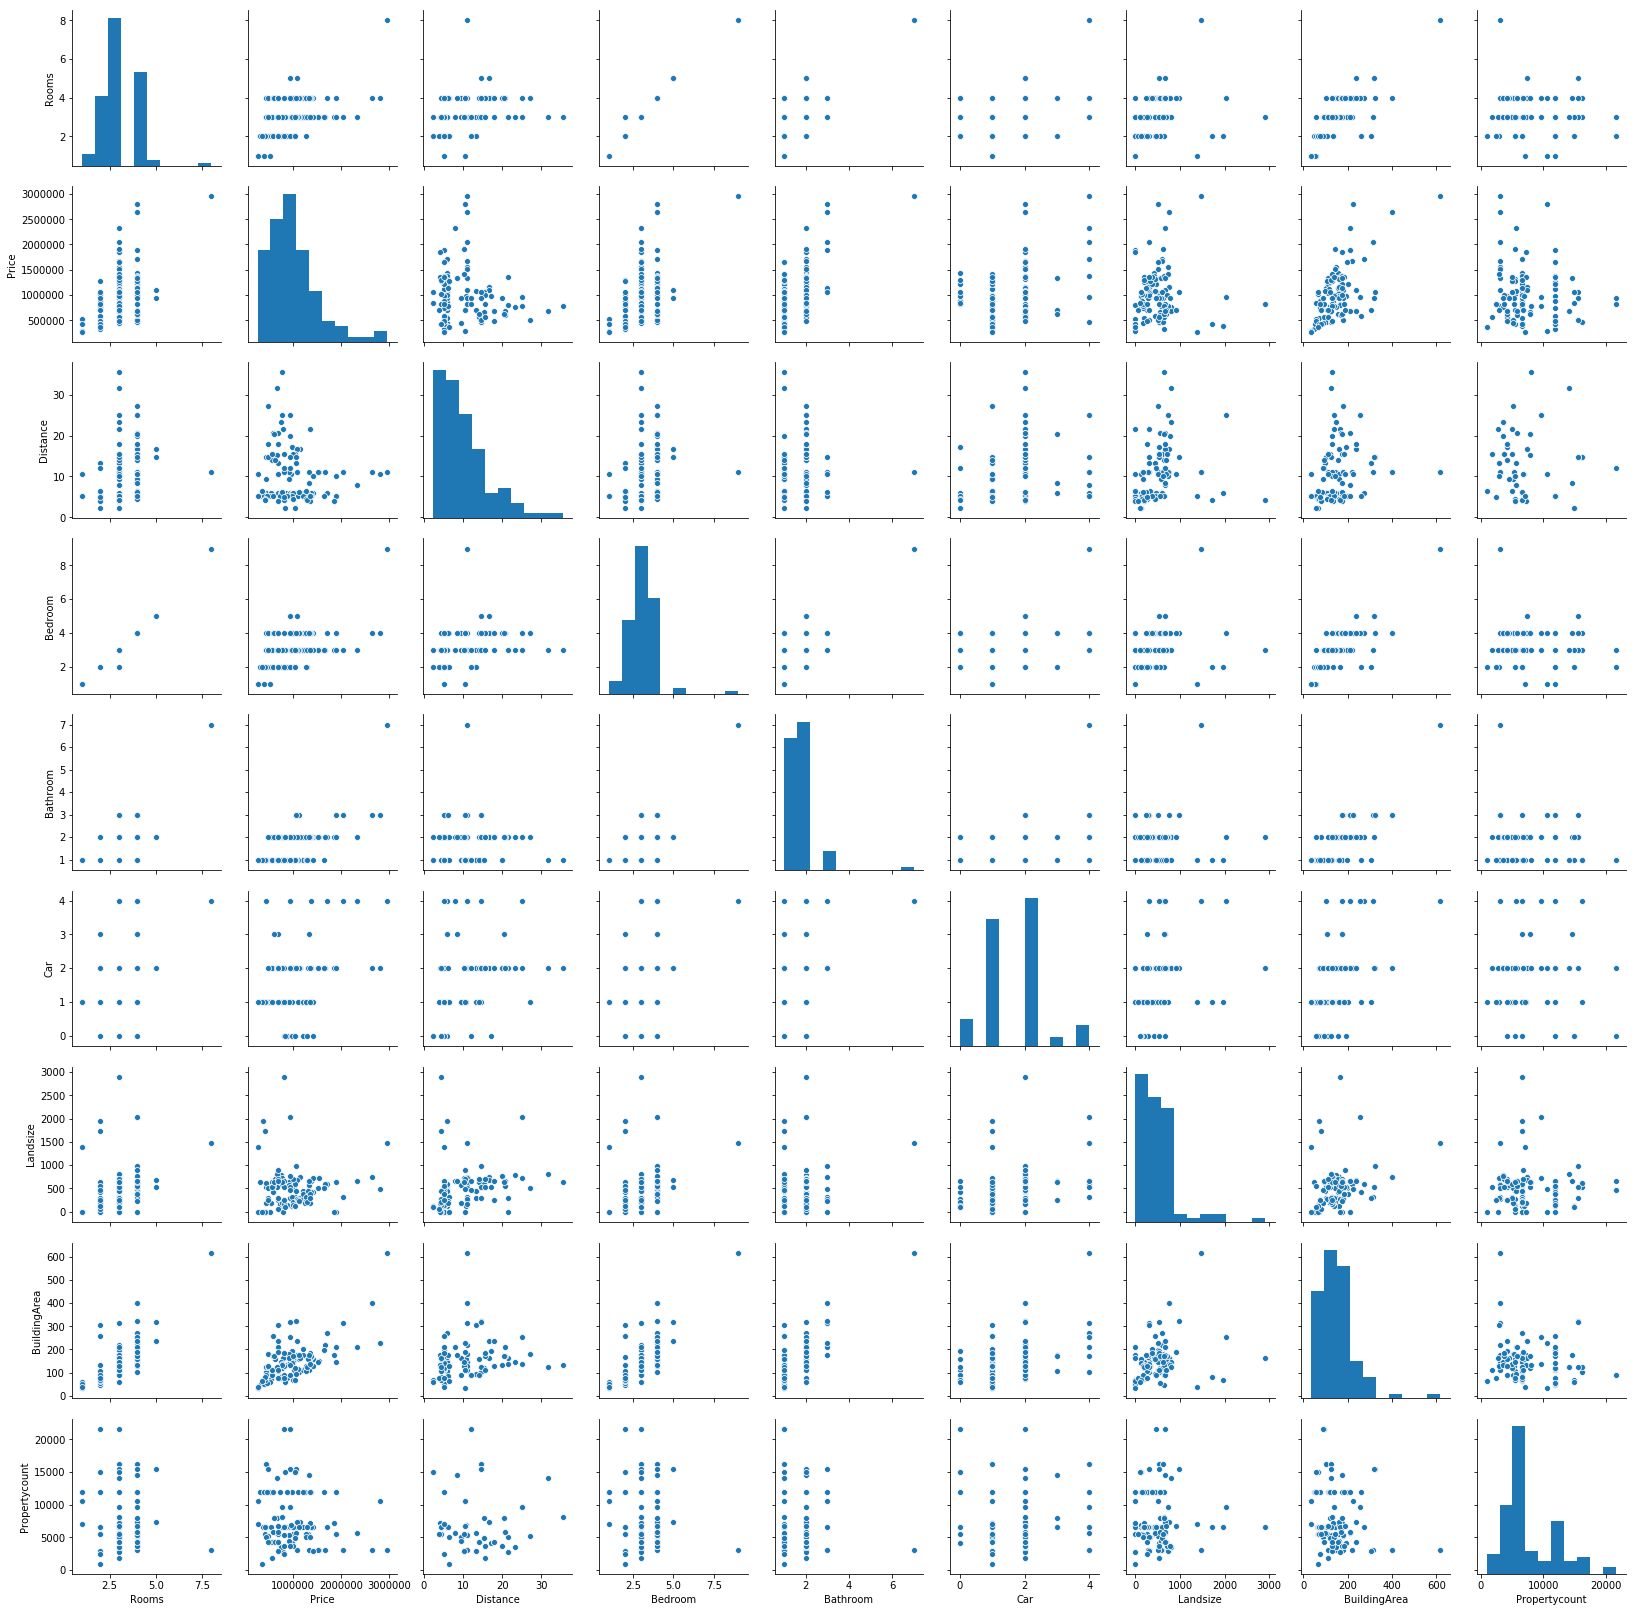

In [38]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
#columns.
sns.pairplot(data)

To see the patterns interesting us in details, we can plot the pairs using appropriate types of plots. For this particular case there are not too many variables, so the plot is quite representative and no need for additional ones.

 <h3><u>Checking for correlations (multicollinearity)</u></h3>

In [39]:
#lets see the corrplot
data.corr()

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount
Rooms,1.000000,0.496441,0.322496,0.992288,0.693759,0.427596,0.289627,0.743288,-0.094804
Price,0.496441,1.000000,-0.141503,0.498843,0.570595,0.329081,0.041088,0.628836,-0.134389
Distance,0.322496,-0.141503,1.000000,0.312113,0.133916,0.334017,0.244377,0.220520,-0.085765
Bedroom,0.992288,0.498843,0.312113,1.000000,0.724278,0.433750,0.298613,0.753977,-0.097368
Bathroom,0.693759,0.570595,0.133916,0.724278,1.000000,0.427814,0.187223,0.765947,-0.175644
Car,0.427596,0.329081,0.334017,0.433750,0.427814,1.000000,0.311213,0.487816,-0.102099
Landsize,0.289627,0.041088,0.244377,0.298613,0.187223,0.311213,1.000000,0.284929,-0.044187
BuildingArea,0.743288,0.628836,0.220520,0.753977,0.765947,0.487816,0.284929,1.000000,-0.150502
Propertycount,-0.094804,-0.134389,-0.085765,-0.097368,-0.175644,-0.102099,-0.044187,-0.150502,1.000000


There are a lot of pairs having high correlation, but the representation is not convenient to see the overall picture, thus we will use some visualizations.

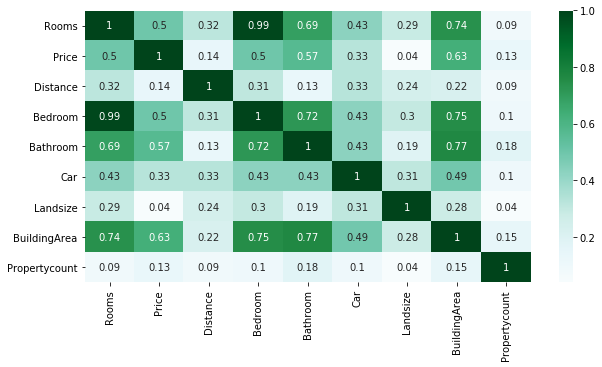

In [40]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

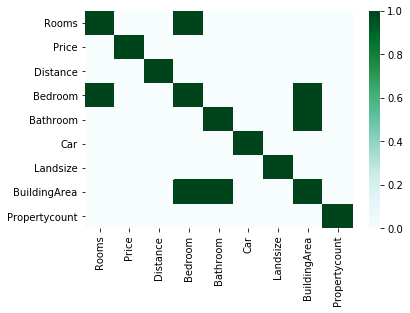

In [41]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
sns.heatmap(data.corr().abs()>=0.75, cmap = "BuGn")

In [42]:
#let's drop Bedroom and bathroom variables, as they have high correlation coefficient and 
#the information is repeated in number of rooms.
data.drop(["Bedroom", "Bathroom"],axis=1,inplace=True)

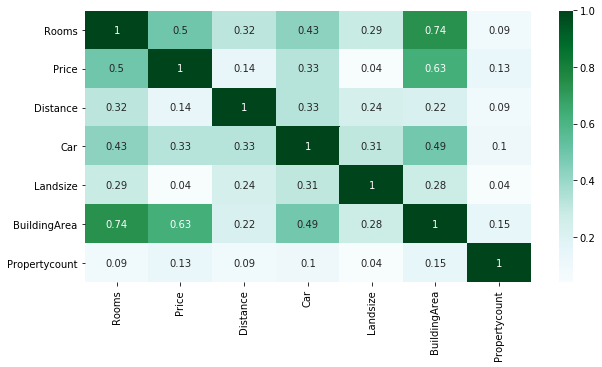

In [43]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

After dropping the noted variables we see that there is no correlation coefficient higher than 0.75 so won't exclude any other variable.

In [44]:
#let's convert categorical variables in the dataset into dummy variables
data=pd.get_dummies(data,drop_first=True)
data.head()

,Rooms,Price,Distance,Car,Landsize,BuildingArea,Propertycount,Type_t,Type_u,Method_S,Method_SP,Method_VB,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
0,2,865000,5.9,1,146,132.0,6567,1,0,0,1,0,0,0,0,1
1,2,442000,5.9,1,0,62.0,6567,0,1,1,0,0,0,0,0,1
2,3,1037500,5.9,2,506,110.0,6567,0,0,1,0,0,0,0,0,1
3,3,1050000,5.9,2,318,160.0,6567,1,0,1,0,0,0,0,0,1
4,2,440000,5.9,1,0,65.0,6567,0,1,1,0,0,0,0,0,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern Metropolitan         110 non-null uint8
Regionname_South-Eastern Metropolitan    110 non-null uint8
Regionname_Southern Metropolitan         110 non-nu

In [46]:
#as the names of newly creayed dummy variables contain space and "-", let's replace with underscore ("_")
data.columns=data.columns.str.replace(" ","_")
data.columns=data.columns.str.replace("-","_")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-nu

<h1> 4. Running and building the OLS model /statsmodels/(backward selection, model transformation, test performance)) </h1> <a name="stats">

We will perform 2-step backward stepwise regression and one transformed model. The steps will be as following:
    1. split the data into train and test sets,
    2. build(fit) the model on the train set and see the summary (look at R-squared),
    3. make predictions for the test set and calculate the R-squared,
    4. compare train-test score gap, analyse train model coefficients p-values and make the transformations,
    5. repeat until a desired score is got,
    6. in case of having several competing models (from test score similarity point), check assumptions for all models and    select the one holding all of them. If LINE is not held, transform the data further.
    7. NOTE: Coefficients are interpreted for the models fitted on training set.

In [48]:
#setting the independent and dependent varables
Y=data["Price"]
X=data.drop("Price", axis=1)

In [49]:
X.shape

(110, 15)

In [50]:
#Splitting the data into train and test sets 0s are for train and 1s for test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [51]:
# Adding a constant term to the predictor, the intercept is not included in the model and should be added by the user
X0=sm.add_constant(X0)

In [52]:
model_linear= sm.OLS(Y0,X0)

<b>Next, build the model.</b>

In [53]:
results=model_linear.fit()

<b>Last, see the summary.</b>

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     27.62
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.12e-22
Time:                        20:43:54   Log-Likelihood:                -1110.2
No. Observations:                  82   AIC:                             2252.
Df Residuals:                      66   BIC:                             2291.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.024e+06   1.64e+05      6.228      0.000    6.96e+05    1.35e+06
Rooms                                  2.803e+04   4.73e+04      0.593      0.555   -6.64e+04    1.22e+05
Distance                              -3.321e+04   5132.614     -6.471      0.000   -4.35e+04    -2.3e+04
Car                                    3.956e+04   2.92e+04      1.357      0.179   -1.87e+04    9.78e+04
Landsize                                -43.4948     81.371     -0.535      0.595    -205.957     118.968
BuildingArea                           1819.2376    542.327      3.355      0.001     736.446    2902.029
Propertycount                             6.8799      6.543      1.052      0.297      -6.183      19.943
Type_t                                 -1.08e+05   9.07e+04     -1.191      0.238   -2.89e+05    7.31e+04
Type_u                                 -4.24e+05   8.48e+04     -4.998      0.000   -5.93e+05   -2.55e+05
Method_S                                9.02e+04   7.57e+04      1.192      0.238   -6.09e+04    2.41e+05
Method_SP                              1.393e+05   1.04e+05      1.344      0.183   -6.76e+04    3.46e+05
Method_VB                              5.957e+05   1.47e+05      4.043      0.000    3.02e+05     8.9e+05
Regionname_Northern_Metropolitan      -2.764e+05   1.18e+05     -2.335      0.023   -5.13e+05      -4e+04
Regionname_South_Eastern_Metropolitan  9.365e+04    1.2e+05      0.779      0.439   -1.46e+05    3.34e+05
Regionname_Southern_Metropolitan       5.724e+05   1.17e+05      4.907      0.000    3.39e+05    8.05e+05
Regionname_Western_Metropolitan       -3.268e+05   1.04e+05     -3.129      0.003   -5.35e+05   -1.18e+05
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.134
Skew:                           0.095   Prob(JB):                        0.935
Kurtosis:                       2.944   Cond. No.                     9.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#Let's see the significant and not significant variables
results.pvalues[results.pvalues<0.05]

const                               3.725794e-08
Distance                            1.399009e-08
BuildingArea                        1.321115e-03
Type_u                              4.517875e-06
Method_VB                           1.402679e-04
Regionname_Northern_Metropolitan    2.261061e-02
Regionname_Southern_Metropolitan    6.365828e-06
Regionname_Western_Metropolitan     2.614497e-03
dtype: float64

In [56]:
#not significant ones
results.pvalues[results.pvalues>0.05]

Rooms                                    0.555367
Car                                      0.179472
Landsize                                 0.594775
Propertycount                            0.296860
Type_t                                   0.238029
Method_S                                 0.237568
Method_SP                                0.183465
Regionname_South_Eastern_Metropolitan    0.438514
dtype: float64

In [57]:
#The R-squared and R-squared adjusted of the first model including all the variables, are the following, in respective order:
#0.863 and 0.831
#Let's see how the model performs on the test set (external validity) and then check its internal validity.

In [58]:
#predicting for train and test data
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

In [59]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.8626070936982513
R-squared Test: 0.49828911142225674


In [60]:
#the constant ("const") is already in the model, so we don't add it manually
Y0_second=Y0
X0_second=X0.drop("Landsize", axis=1)

In [61]:
#running and building using one line of code
results_1= sm.OLS(Y0_second,X0_second).fit()

In [62]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     29.90
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           2.29e-23
Time:                        20:44:49   Log-Likelihood:                -1110.4
No. Observations:                  82   AIC:                             2251.
Df Residuals:                      67   BIC:                             2287.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.027e+06   1.64e+05      6.278      0.000       7e+05    1.35e+06
Rooms                                  2.316e+04   4.62e+04      0.502      0.617    -6.9e+04    1.15e+05
Distance                              -3.385e+04   4965.118     -6.817      0.000   -4.38e+04   -2.39e+04
Car                                    3.855e+04   2.89e+04      1.332      0.187   -1.92e+04    9.63e+04
BuildingArea                           1808.5484    539.062      3.355      0.001     732.576    2884.520
Propertycount                             6.7309      6.502      1.035      0.304      -6.247      19.709
Type_t                                -9.729e+04    8.8e+04     -1.106      0.273   -2.73e+05    7.83e+04
Type_u                                -4.312e+05   8.33e+04     -5.175      0.000   -5.97e+05   -2.65e+05
Method_S                               9.511e+04   7.47e+04      1.273      0.207    -5.4e+04    2.44e+05
Method_SP                              1.478e+05   1.02e+05      1.450      0.152   -5.56e+04    3.51e+05
Method_VB                                6.1e+05   1.44e+05      4.234      0.000    3.22e+05    8.98e+05
Regionname_Northern_Metropolitan      -2.746e+05   1.18e+05     -2.333      0.023    -5.1e+05   -3.96e+04
Regionname_South_Eastern_Metropolitan  9.917e+04   1.19e+05      0.833      0.408   -1.38e+05    3.37e+05
Regionname_Southern_Metropolitan       5.694e+05   1.16e+05      4.913      0.000    3.38e+05    8.01e+05
Regionname_Western_Metropolitan       -3.303e+05   1.04e+05     -3.185      0.002   -5.37e+05   -1.23e+05
==============================================================================
Omnibus:                        0.250   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.161
Skew:                           0.107   Prob(JB):                        0.923
Kurtosis:                       2.960   Cond. No.                     9.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#X1 still has "Landsize" feature and lacks "const" variable added by add_constant, 
#so we will have to drop Landsize in order to make predictions
X1.columns.tolist()

['Rooms',
 'Distance',
 'Car',
 'Landsize',
 'BuildingArea',
 'Propertycount',
 'Type_t',
 'Type_u',
 'Method_S',
 'Method_SP',
 'Method_VB',
 'Regionname_Northern_Metropolitan',
 'Regionname_South_Eastern_Metropolitan',
 'Regionname_Southern_Metropolitan',
 'Regionname_Western_Metropolitan']

In [70]:
#Lets see the model's predictions for train and test sets. We drop Landsize from the test data for this model.
Y0_linear_2=results_1.predict(X0_second)
Y1_linear_2=results_1.predict(sm.add_constant(X1.drop("Landsize", axis=1)))

In [71]:
#let's see r-squared for train and test sets for the model without Landsize
print("R-squared Train:",r2_score(Y0,Y0_linear_2))
print("R-squared Test:",r2_score(Y1,Y1_linear_2))


R-squared Train: 0.8620123154854359
R-squared Test: 0.4969844506793826


We can see that the second model has marginally worse R-squared for the test set. In case of backward selection,
one should continue removing the not significant variables based on their p-value size.
This process can be continued till some desired output of R-squared and R-squared adjusted is reached

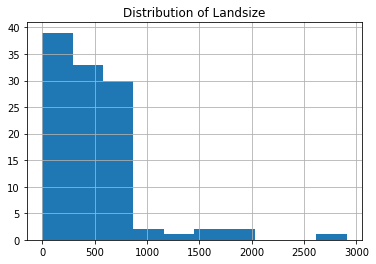

In [73]:
data.Landsize.hist()
plt.title("Distribution of Landsize")
plt.show()

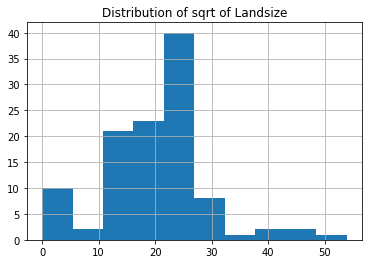

In [74]:
np.sqrt(data.Landsize).hist()
plt.title("Distribution of sqrt of Landsize")
plt.show()

<h3>Model transformation</h3>
Let's also try to transform our model using log-linear one (as price is right skewed) and add an interaction term. 
E.g. we have Rooms and Building area correlation coefficient as 0.74, so instead of including both of them, will include the interaction term as <b><u> Building Area/Rooms, to get average area per room</b></u>
Also, let's take a square root of Landsize, to have less skewed data (see the histograms above).


In [75]:
#let's save the data for transformed model in a new dataframe and only then modify it for a model
data_tr=data

In [76]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
Rooms                                    110 non-null int64
Price                                    110 non-null int64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null int64
BuildingArea                             110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-nu

In [77]:
data_tr["Price"]=np.log(data["Price"])


In [78]:
data_tr["Landsize"]=np.sqrt(data["Landsize"])

In [79]:
data_tr["Rooms_Build"]=data_tr["BuildingArea"]/data_tr["Rooms"]

In [80]:
data_tr.drop(["Rooms", "BuildingArea"],axis=1,inplace=True)

In [81]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
Price                                    110 non-null float64
Distance                                 110 non-null float64
Car                                      110 non-null int64
Landsize                                 110 non-null float64
Propertycount                            110 non-null int64
Type_t                                   110 non-null uint8
Type_u                                   110 non-null uint8
Method_S                                 110 non-null uint8
Method_SP                                110 non-null uint8
Method_VB                                110 non-null uint8
Regionname_Northern_Metropolitan         110 non-null uint8
Regionname_South_Eastern_Metropolitan    110 non-null uint8
Regionname_Southern_Metropolitan         110 non-null uint8
Regionname_Western_Metropolitan          110 non-null uint8
Rooms_Build                              110 non-

In [83]:
Y_tr=data_tr["Price"]
X_tr=data_tr.drop("Price", axis=1)
X_tr=sm.add_constant(X_tr)

In [84]:
X0_tr,X1_tr,Y0_tr,Y1_tr=train_test_split(X_tr,Y_tr, test_size=0.25, random_state=42)

In [85]:
results_tr=sm.OLS(Y0_tr, X0_tr).fit()

In [86]:
results_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     17.92
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.99e-17
Time:                        20:48:54   Log-Likelihood:                 14.939
No. Observations:                  82   AIC:                            0.1216
Df Residuals:                      67   BIC:                             36.22
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    14.0555      0.180     78.112      0.000      13.696      14.415
Distance                                 -0.0364      0.006     -6.543      0.000      -0.048      -0.025
Car                                       0.0415      0.031      1.355      0.180      -0.020       0.103
Landsize                                 -0.0001      0.004     -0.039      0.969      -0.007       0.007
Propertycount                          5.517e-06   7.12e-06      0.774      0.441    -8.7e-06    1.97e-05
Type_t                                   -0.1443      0.100     -1.448      0.152      -0.343       0.055
Type_u                                   -0.7184      0.085     -8.497      0.000      -0.887      -0.550
Method_S                                  0.0708      0.082      0.863      0.391      -0.093       0.235
Method_SP                                 0.1667      0.111      1.498      0.139      -0.055       0.389
Method_VB                                 0.4136      0.160      2.591      0.012       0.095       0.732
Regionname_Northern_Metropolitan         -0.3480      0.131     -2.649      0.010      -0.610      -0.086
Regionname_South_Eastern_Metropolitan     0.1271      0.132      0.961      0.340      -0.137       0.391
Regionname_Southern_Metropolitan          0.3761      0.127      2.965      0.004       0.123       0.629
Regionname_Western_Metropolitan          -0.4107      0.115     -3.559      0.001      -0.641      -0.180
Rooms_Build                               0.0045      0.002      2.691      0.009       0.001       0.008
==============================================================================
Omnibus:                        0.346   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.242
Skew:                          -0.132   Prob(JB):                        0.886
Kurtosis:                       2.963   Cond. No.                     9.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#further steps can be based also on backward stepwise elimination or using AIC/BIC forward/backward selection methods.

In [88]:
Y0_linear_tr=results_tr.predict(X0_tr)
Y1_linear_tr=results_tr.predict(X1_tr)

In [89]:
#let's see r-squared for train and test sets for the transformed model
print("R-squared Train:",r2_score(Y0_tr,Y0_linear_tr))
print("R-squared Test:",r2_score(Y1_tr,Y1_linear_tr))

R-squared Train: 0.7892681973199955
R-squared Test: 0.5356190086576444


So from external validity point, the transformed model is performs better. Thus we will check assumptions for that model.

<h1>5.Checking LR assumptions using residual analysis (visual evidence)</h1><a name="resid"></a>

To check the assumptions using residual analysis we will plot the fitted values vs error terms (residuals). It should not exhibit any patterns (should be randomly distributed) to meet the Linearity, Normality and Independence assumptions.

In [90]:
#residuals of the model
residuals=results_tr.resid
predicted_values=results_tr.predict()

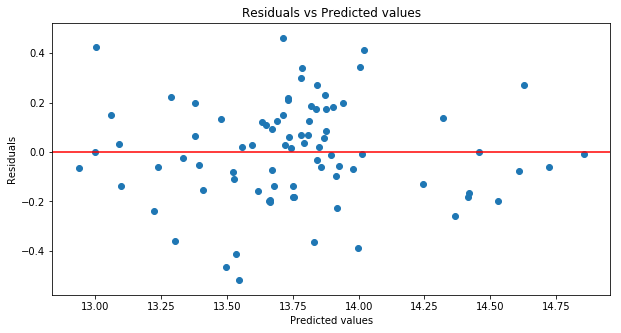

In [91]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is random and we cannot see an increasing/decreasing variance.

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


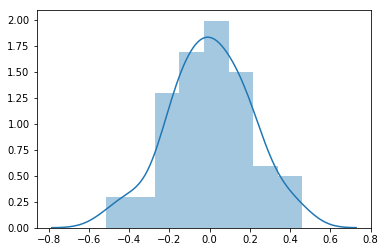

In [92]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

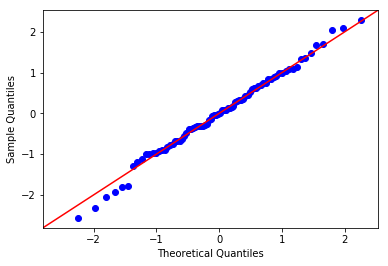

In [93]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is approximately bell-shaped, so based on the plot only we can say that the normality assumption is held.
QQ-plot shows that the there are several outliers, but overall the dots are along the line.

<h2>Diagnostic tests for LINE assumptions </h2>

In [94]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results_tr)
print(list(zip(rnames, rainbow)))

[('fstat', 2.1518455928136073), ('p-value', 0.020804416374665118)]


Linearity assumption is held at 1% significance level (p-value=0.02>0.01).

In [95]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results_tr.model.exog)
print(list(zip(bnames, breush)))


[('Lagrange multiplier statistic', 21.27020971355635), ('p-value', 0.09490584531058491), ('f-value', 1.6761649596710049), ('f p-value', 0.08190285375719175)]


In [96]:
#We fail to reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is hold.

In [97]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9916415810585022), ('p-value', 0.8799199461936951)]


Test confirms that the data was drawn from a normal distribution.

In [98]:
#defining colnames 
var=data_tr.columns.tolist()

In [99]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(data_tr[var].values, i) for i in range(0,len(var))]
print(vif)

[53.88619961432709, 7.421161583281069, 5.784262028961987, 7.428441064537424, 6.387626126393309, 1.2962349427429183, 1.4804546028816288, 7.37554989987968, 2.6259169057065126, 1.6093042036374754, 7.808463982971877, 2.0900153582700933, 3.77325577477526, 8.903659580554606, 9.820450336463788]


In [100]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

Price : 53.88619961432709
Distance : 7.421161583281069
Car : 5.784262028961987
Landsize : 7.428441064537424
Propertycount : 6.387626126393309
Type_t : 1.2962349427429183
Type_u : 1.4804546028816288
Method_S : 7.37554989987968
Method_SP : 2.6259169057065126
Method_VB : 1.6093042036374754
Regionname_Northern_Metropolitan : 7.808463982971877
Regionname_South_Eastern_Metropolitan : 2.0900153582700933
Regionname_Southern_Metropolitan : 3.77325577477526
Regionname_Western_Metropolitan : 8.903659580554606
Rooms_Build : 9.820450336463788


As we see for some variables we have vary big VIF values, so the there are highly correlated variables in the model. We should drop the correlated variables one by one.

<b>!Note: To choose the best model, we also should compare the model diagnostics for the models we outlined and select the one 
    having better test results and/or passing diagnostic tests</b>. In case of failing LINE assumptions, the analysis/transformation
    should be continued to have BLUE.